# Intro



In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

In [4]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")

CUDA available: True
Device count: 1
Device name: NVIDIA GeForce RTX 4070


# Cat classifier

In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

In [6]:
print(path)

/home/filippo/.fastai/data/oxford-iiit-pet/images


In [7]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

In [8]:
learner = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/filippo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████| 83.3M/83.3M [00:01<00:00, 81.1MB/s]


In [9]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.171671,0.027892,0.006766,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.059217,0.023385,0.004736,00:12


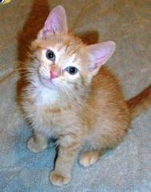

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
def load_and_predict(path):
  img = PILImage.create(path)
  return img
img = load_and_predict(uploader.data[0])

In [ ]:
is_cat,_,probs = learner.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.042091


# Segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
print(path)

/root/.fastai/data/camvid_tiny


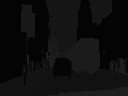

In [ ]:
def img_to_label(img):
  return path/'labels'/f'{img.stem}_P{img.suffix}'

from pathlib import Path
img_path = Path("/root/.fastai/data/camvid_tiny/images/0001TP_006750.png")
label_path = img_to_label(img_path)
PILImage.create(label_path).to_thumb(192)

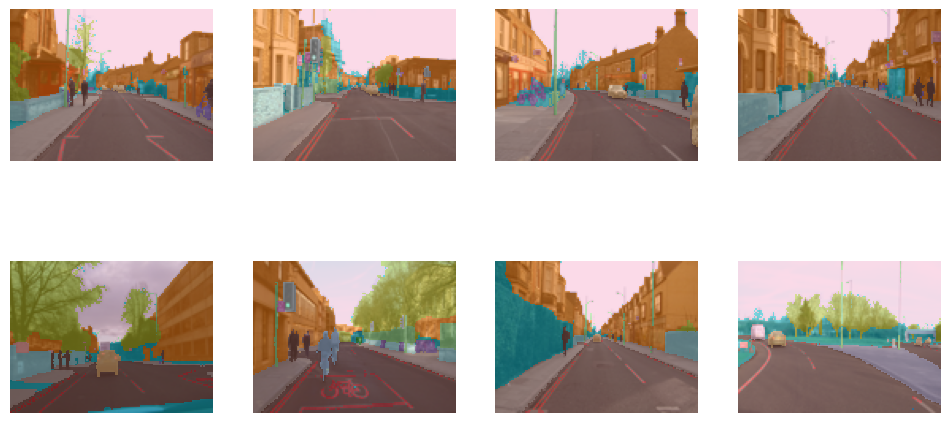

In [ ]:
input_paths = get_image_files(path/'images')
label_list = np.loadtxt(path/'codes.txt', dtype=str)

dls = SegmentationDataLoaders.from_label_func(
    path=path,
    fnames=input_paths,
    label_func=img_to_label,
    bs=8,
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

dls.show_batch();

In [ ]:
learner = unet_learner(dls, resnet34)
learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.395372,2.764850,00:01


epoch,train_loss,valid_loss,time
0,2.072508,1.652705,00:01
1,1.664275,1.393040,00:01
2,1.427670,1.146401,00:01
3,1.277252,1.028887,00:01
4,1.147436,0.946198,00:01
5,1.033442,0.880636,00:02
6,0.942574,0.900540,00:02
7,0.873044,0.901199,00:02


In [ ]:
print(len(input_paths))

100


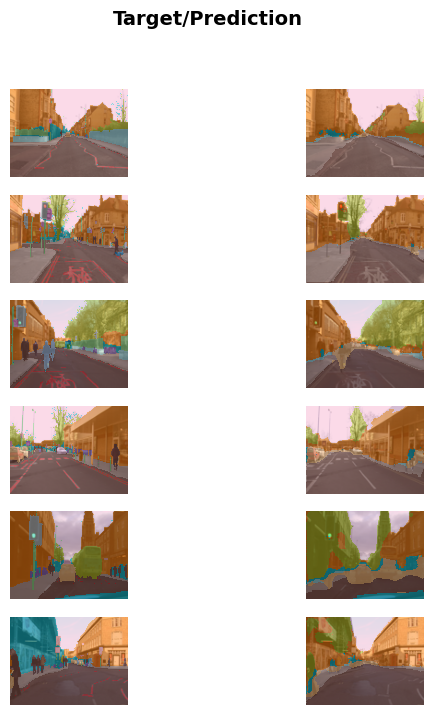

In [ ]:
learner.show_results(max_n=6, figsize=(7,8))

# Text

In [ ]:
from fastai.text.all import *

In [ ]:
imdb_data = untar_data(URLs.IMDB)

In [ ]:
dls = TextDataLoaders.from_folder(imdb_data, train='train', valid='test')

In [ ]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learner.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464207,0.397401,0.822720,03:30


epoch,train_loss,valid_loss,accuracy,time
0,0.316954,0.261191,0.894960,07:16
1,0.251747,0.212542,0.915920,07:16
2,0.183965,0.188864,0.929120,07:15
3,0.145923,0.197208,0.928560,07:15


In [ ]:
learner.predict("I don't understand why people love this, it is bad, bad,bad")

('neg', tensor(0), tensor([0.9231, 0.0769]))

# Tabular

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [ ]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,False,58.000000,248739.002219,9.0,>=50k
1,Private,Prof-school,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,False,35.000000,356250.004923,15.0,<50k
2,Private,Bachelors,Married-civ-spouse,Machine-op-inspct,Husband,White,False,32.000000,131424.998467,13.0,<50k
3,Private,Bachelors,Divorced,Exec-managerial,Unmarried,Black,False,49.000000,114796.999087,13.0,<50k
4,Private,10th,Married-civ-spouse,Sales,Husband,White,False,55.999999,31781.997560,6.0,<50k
5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Black,False,58.000000,357788.005703,9.0,<50k
6,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,54.000000,298215.005172,13.0,>=50k
7,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,37.000000,103985.997316,13.0,>=50k
8,Private,5th-6th,Married-civ-spouse,Craft-repair,Husband,White,False,53.000001,194994.999942,3.0,<50k
9,Private,9th,Never-married,Transport-moving,Not-in-family,White,False,17.000001,176467.000111,5.0,<50k


In [ ]:
learner = tabular_learner(dls, metrics=accuracy)

In [ ]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371116,0.371829,0.832770,00:11
1,0.349699,0.356814,0.835842,00:09
2,0.361239,0.349084,0.840756,00:05


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(path/'adult.csv')
row = df.iloc[0].copy()
row['occupation'] = 'Farming-fishing'
row['workclass'] = 'Self-emp-inc'
row['education'] = 'Bachelors'

print(row)
print('--------')
row, clas, probs = learner.predict(row)
print (probs)

age                                49
workclass                Self-emp-inc
fnlwgt                         101320
education                   Bachelors
education-num                    12.0
marital-status     Married-civ-spouse
occupation            Farming-fishing
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object
--------


tensor([0.7932, 0.2068])


# Collab

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)


In [ ]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [ ]:
learner = collab_learner(dls, y_range=(0.5,5.5))

In [ ]:
learner.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.533231,1.436739,00:02


epoch,train_loss,valid_loss,time
0,1.375718,1.380711,00:01
1,1.261427,1.218282,00:00
2,1.018925,0.935738,00:00
3,0.805508,0.773836,00:00
4,0.692346,0.728528,00:00
5,0.647550,0.710659,00:00
6,0.608584,0.702049,00:00
7,0.589826,0.698683,00:00
8,0.592816,0.697136,00:00
9,0.605813,0.696900,00:00


In [ ]:
learner.show_results()

,userId,movieId,rating,rating_pred
0,41.0,4.0,4.0,3.793807
1,62.0,43.0,3.0,3.623302
2,53.0,54.0,5.0,4.610016
3,20.0,47.0,3.5,4.154639
4,63.0,4.0,1.0,3.037356
5,23.0,4.0,2.0,3.143778
6,67.0,90.0,3.5,3.198517
7,28.0,38.0,2.5,2.968935
8,70.0,18.0,5.0,4.734835


TypeError: list indices must be integers or slices, not list